In [200]:
# importar las librerías necesarias
import os
import itertools
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from keras.callbacks import EarlyStopping

In [201]:
base_dir = './chest_xray'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

In [202]:
'''
# Directorio que contiene las imágenes originales
directorio_imagenes_originales = "./chest_xray/train/NORMAL/"

# Directorio donde guardarás las nuevas imágenes generadas
directorio_destino = "./chest_xray/train/NORMAL/"

# Carga las imágenes originales desde la carpeta
imagenes_originales = []
for nombre_archivo in os.listdir(directorio_imagenes_originales):
    ruta_archivo = os.path.join(directorio_imagenes_originales, nombre_archivo)
    if os.path.isfile(ruta_archivo):
        imagen = cv2.imread(ruta_archivo)
        imagenes_originales.append(imagen)

# Aplica técnicas de aumento de datos para generar nuevas imágenes
imagenes_generadas = []
for imagen_original in imagenes_originales:
    # Aquí puedes aplicar diferentes técnicas de aumento de datos, como rotación, escala, cambio de brillo/contraste, etc.
    # Por ejemplo, vamos a voltear horizontalmente la imagen y cambiar su brillo
    imagen_flip = cv2.flip(imagen_original, 1)  # 1 para flip horizontal
    imagen_brillo = cv2.add(imagen_original, np.array([50.0]))  # Aumenta el brillo en 50

    # Genera ruido gaussiano en la imagen
    mean = 0
    std = 25  # Cambiar este valor para ajustar la intensidad del ruido
    imagen_ruido_gaussiano = np.zeros(imagen_original.shape, dtype=np.uint8)
    cv2.randn(imagen_ruido_gaussiano, mean, std)
    imagen_con_ruido = cv2.add(imagen_original, imagen_ruido_gaussiano)

    # Agrega las imágenes generadas a la lista de imágenes generadas
    imagenes_generadas.append(imagen_flip)
    imagenes_generadas.append(imagen_brillo)
    imagenes_generadas.append(imagen_con_ruido)

# Guarda las imágenes generadas en el directorio de destino
for i, imagen_generada in enumerate(imagenes_generadas):
    nombre_archivo = f"imagen_generada_{i}.jpeg"  # Cambia la extensión dependiendo del tipo de imagen
    ruta_archivo = os.path.join(directorio_destino, nombre_archivo)
    cv2.imwrite(ruta_archivo, imagen_generada)

print("Imágenes generadas guardadas exitosamente.")
'''

'\n# Directorio que contiene las imágenes originales\ndirectorio_imagenes_originales = "./chest_xray/train/NORMAL/"\n\n# Directorio donde guardarás las nuevas imágenes generadas\ndirectorio_destino = "./chest_xray/train/NORMAL/"\n\n# Carga las imágenes originales desde la carpeta\nimagenes_originales = []\nfor nombre_archivo in os.listdir(directorio_imagenes_originales):\n    ruta_archivo = os.path.join(directorio_imagenes_originales, nombre_archivo)\n    if os.path.isfile(ruta_archivo):\n        imagen = cv2.imread(ruta_archivo)\n        imagenes_originales.append(imagen)\n\n# Aplica técnicas de aumento de datos para generar nuevas imágenes\nimagenes_generadas = []\nfor imagen_original in imagenes_originales:\n    # Aquí puedes aplicar diferentes técnicas de aumento de datos, como rotación, escala, cambio de brillo/contraste, etc.\n    # Por ejemplo, vamos a voltear horizontalmente la imagen y cambiar su brillo\n    imagen_flip = cv2.flip(imagen_original, 1)  # 1 para flip horizontal\

In [203]:
# definir los parámetros de la red convolucional
input_shape = (256, 256, 3)
num_classes = 2
learning_rate = 0.0001
batch_size = 64
epochs = 20

# Clasificación 1: Pneumonia vs Normal
CLASS_NAMES = ['Normal', 'Pneumonia']

# crear generadores de datos
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [204]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical')

Found 9239 images belonging to 2 classes.


In [205]:
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical')

Found 16 images belonging to 2 classes.


In [206]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical')

Found 624 images belonging to 2 classes.


In [207]:
# definir la arquitectura de la red
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))#68
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [208]:
# compilar el modelo
model.compile(optimizer=Adam(learning_rate=learning_rate),
              loss=categorical_crossentropy,
              metrics=['accuracy'])


In [209]:
# Crear el callback EarlyStopping
early_stop = EarlyStopping(monitor='loss', baseline=0.2, restore_best_weights=True)

# Entrenar el modelo con el callback EarlyStopping
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator,
    callbacks=[early_stop]
)


Epoch 1/20
145/145 [==============================] - 803s 6s/step - loss: 0.4705 - accuracy: 0.7797 - val_loss: 0.4498 - val_accuracy: 0.8125
Epoch 2/20
145/145 [==============================] - 673s 5s/step - loss: 0.2004 - accuracy: 0.9253 - val_loss: 0.2634 - val_accuracy: 0.9375
Epoch 3/20
145/145 [==============================] - 551s 4s/step - loss: 0.1778 - accuracy: 0.9342 - val_loss: 0.6724 - val_accuracy: 0.6875
Epoch 4/20
145/145 [==============================] - 592s 4s/step - loss: 0.1619 - accuracy: 0.9385 - val_loss: 0.2435 - val_accuracy: 0.9375
Epoch 5/20
145/145 [==============================] - 607s 4s/step - loss: 0.1651 - accuracy: 0.9359 - val_loss: 0.2131 - val_accuracy: 0.9375


In [210]:
test_loss, test_acc = model.evaluate(test_generator)
print('Test accuracy:', test_acc)

10/10 [==============================] - 13s 1s/step - loss: 0.2819 - accuracy: 0.8846
Test accuracy: 0.8846153616905212


In [211]:
# Hacer predicciones en el conjunto de prueba
test_pred = model.predict(test_generator)
test_pred_labels = np.argmax(test_pred, axis=1)


# Calcular el porcentaje de aciertos
correct_pred = np.sum(test_pred_labels == test_generator.classes)
total_pred = len(test_generator.classes)
accuracy = correct_pred / total_pred * 100

print('Test prediction: {:.2f}%'.format(accuracy))

10/10 [==============================] - 12s 1s/step
Test prediction: 52.56%


In [212]:
# imprimir la matriz de confusión
test_true_labels = test_generator.classes
cm = confusion_matrix(test_true_labels, test_pred_labels)

print('Matriz de confusión:')
print(cm)

Matriz de confusión:
[[ 82 152]
 [144 246]]


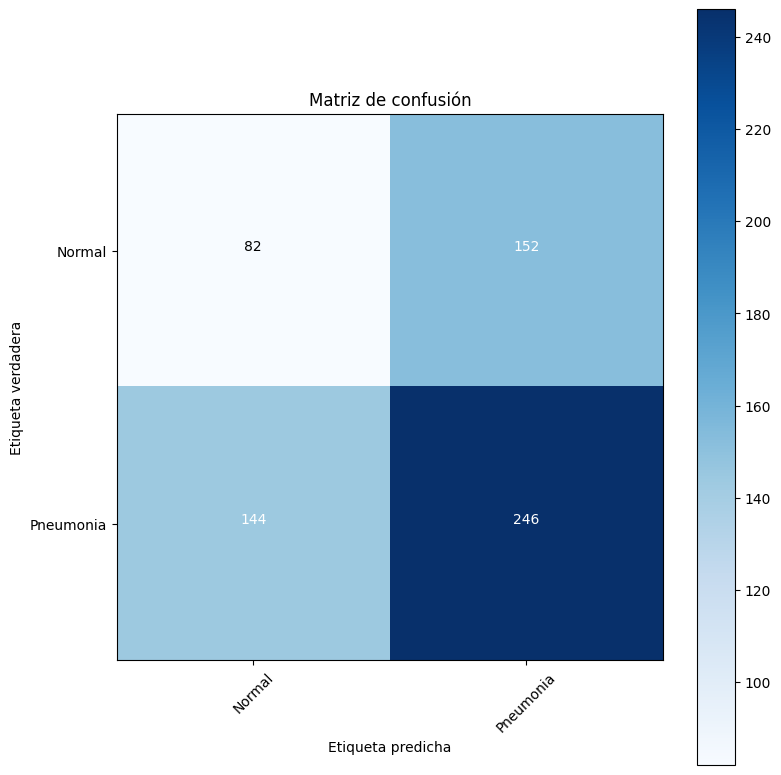

In [213]:
plt.figure(figsize=(8, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de confusión')
plt.colorbar()
tick_marks = np.arange(len(CLASS_NAMES))
plt.xticks(tick_marks, CLASS_NAMES, rotation=45)
plt.yticks(tick_marks, CLASS_NAMES)
fmt = 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black")
    

plt.tight_layout()
plt.ylabel('Etiqueta verdadera')
plt.xlabel('Etiqueta predicha')
plt.show()

In [214]:
# Evaluamos el modelo con los datos del conjunto de test
test_loss, test_acc = model.evaluate(test_generator)
print('Test accuracy:', test_acc)

10/10 [==============================] - 12s 1s/step - loss: 0.2819 - accuracy: 0.8846
Test accuracy: 0.8846153616905212


In [215]:
# Evaluamos el modelo con los datos del conjunto de test
val_loss, val_acc = model.evaluate(val_generator)
print('Validation accuracy:', val_acc)

1/1 [==============================] - 0s 372ms/step - loss: 0.2435 - accuracy: 0.9375
Validation accuracy: 0.9375


Text(0.5, 1.0, 'Evolución de precisión')

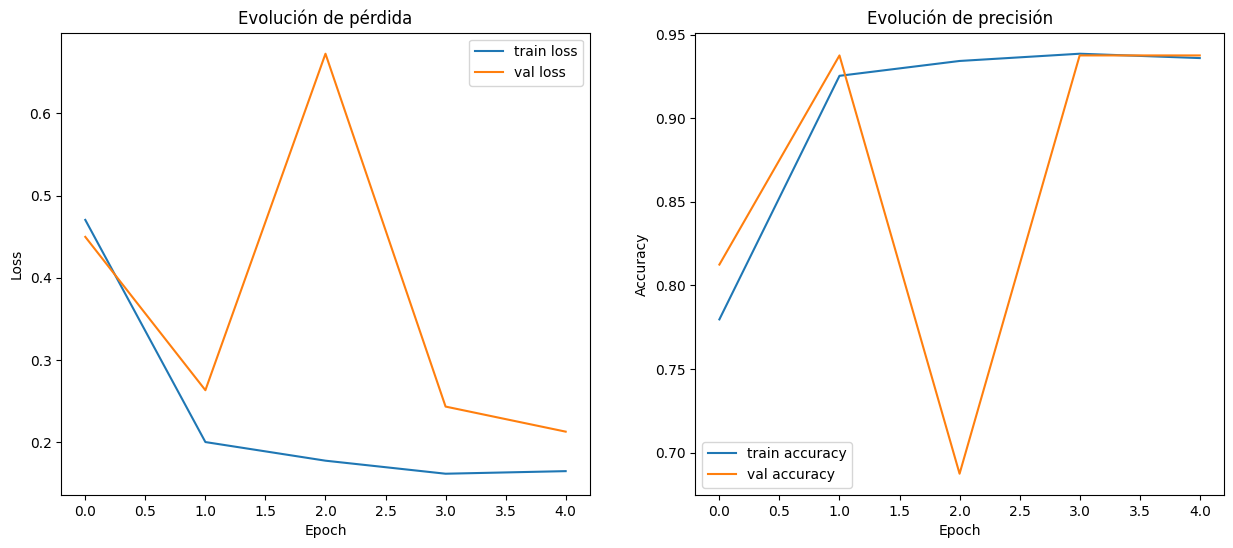

In [216]:
import matplotlib.pyplot as plt

# Obtener los valores de pérdida y precisión del historial de entrenamiento
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

fig, ax = plt.subplots(1,2, figsize=(15,6))
ax[0].plot(train_loss, label='train loss')
ax[0].plot(val_loss, label='val loss')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].legend()
ax[0].set_title('Evolución de pérdida')

ax[1].plot(train_acc, label='train accuracy')
ax[1].plot(val_acc, label='val accuracy')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].legend()
ax[1].set_title('Evolución de precisión')

In [217]:
IMG_WIDTH = 256
IMG_HEIGHT = 256

In [218]:
def predict_image(img_path, prediction):

    # Cargamos la imagen
    img = load_img(img_path, target_size=(IMG_HEIGHT, IMG_WIDTH))
    # Convertimos el arreglo de predicciones a una etiqueta de texto
    label = CLASS_NAMES[np.argmax(prediction)]
    
    # Mostramos la imagen con la etiqueta de predicción
    plt.imshow(img)
    plt.axis('off')
    plt.title(label)
    plt.show()

    # Convertimos la imagen a un array de numpy
    img_array = img_to_array(img)
    
    # Añadimos una dimensión extra al array para que tenga forma (1, IMG_HEIGHT, IMG_WIDTH, 3)
    img_array = np.expand_dims(img_array, axis=0)
    
    # Preprocesamos la imagen dividiendo cada pixel entre 255
    img_array = img_array / 255.0
    
    # Predecimos la categoría de la imagen
    predictions = model.predict(img_array)
    
    # Imprimimos las probabilidades de pertenencia a cada posible categoría
    print('Probabilidades:')
    for i in range(len(CLASS_NAMES)):
        print('{}: {:.2f}%'.format(CLASS_NAMES[i], predictions[0][i]*100))
    
    # Imprimimos la categoría más probable
    predicted_class = np.argmax(predictions[0])
    print('Predicción:', CLASS_NAMES[predicted_class])
    print()
    print()

In [219]:
def predict_folder(folder_path):
    # Obtener la lista de nombres de archivo de la carpeta
    filenames = os.listdir(folder_path)

    for filename in filenames:
        # Obtener la ruta completa del archivo de imagen
        img_path = os.path.join(folder_path, filename)

        # Cargar la imagen como un arreglo numpy
        img_array = img_to_array(load_img(img_path, target_size=(IMG_HEIGHT, IMG_WIDTH)))

        # Añadir una dimensión extra para que tenga forma (1, IMG_HEIGHT, IMG_WIDTH, 3)
        img_array = np.expand_dims(img_array, axis=0)

        # Preprocesar la imagen dividiendo cada pixel entre 255
        img_array = img_array / 255.0

        # Predecir la categoría de la imagen y mostrar la etiqueta
        prediction = model.predict(img_array)
        predict_image(img_path, prediction)

1/1 [==============================] - 0s 114ms/step


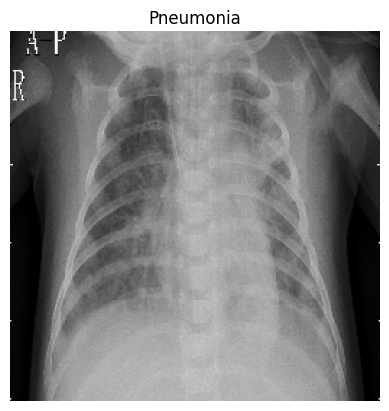

1/1 [==============================] - 0s 46ms/step
Probabilidades:
Normal: 4.77%
Pneumonia: 95.23%
Predicción: Pneumonia


1/1 [==============================] - 0s 42ms/step


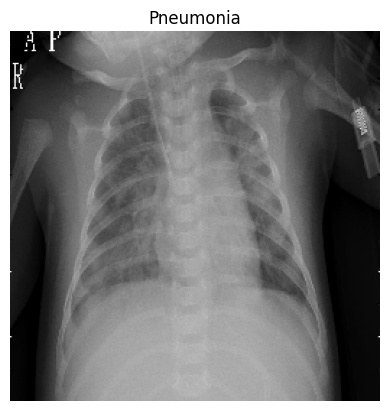

1/1 [==============================] - 0s 50ms/step
Probabilidades:
Normal: 1.00%
Pneumonia: 99.00%
Predicción: Pneumonia


1/1 [==============================] - 0s 40ms/step


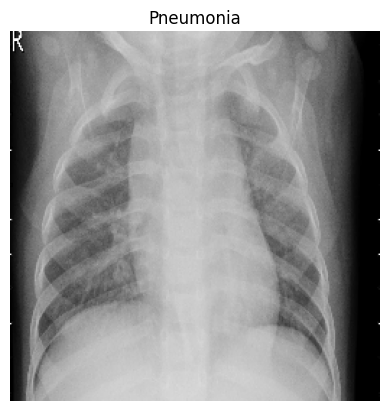

1/1 [==============================] - 0s 45ms/step
Probabilidades:
Normal: 2.44%
Pneumonia: 97.56%
Predicción: Pneumonia


1/1 [==============================] - 0s 43ms/step


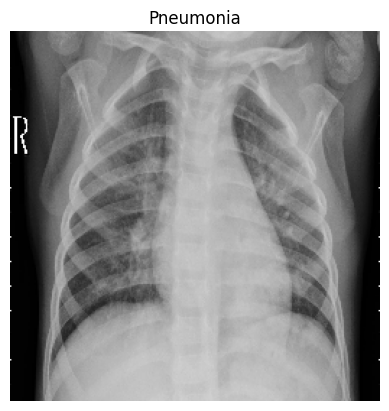

1/1 [==============================] - 0s 49ms/step
Probabilidades:
Normal: 20.47%
Pneumonia: 79.53%
Predicción: Pneumonia


1/1 [==============================] - 0s 40ms/step


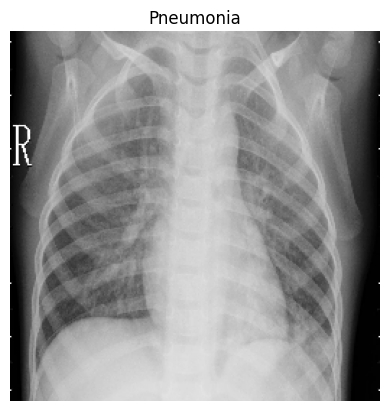

1/1 [==============================] - 0s 44ms/step
Probabilidades:
Normal: 10.17%
Pneumonia: 89.83%
Predicción: Pneumonia


1/1 [==============================] - 0s 43ms/step


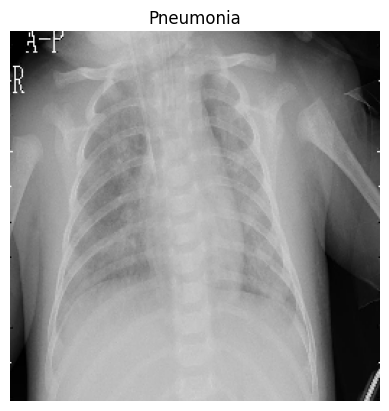

1/1 [==============================] - 0s 42ms/step
Probabilidades:
Normal: 0.43%
Pneumonia: 99.57%
Predicción: Pneumonia


1/1 [==============================] - 0s 44ms/step


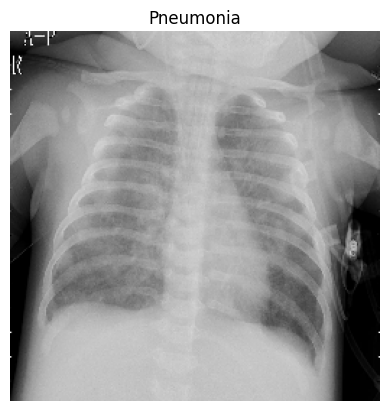

1/1 [==============================] - 0s 45ms/step
Probabilidades:
Normal: 10.58%
Pneumonia: 89.42%
Predicción: Pneumonia


1/1 [==============================] - 0s 42ms/step


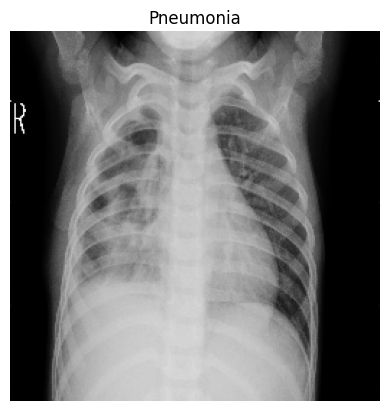

1/1 [==============================] - 0s 41ms/step
Probabilidades:
Normal: 23.06%
Pneumonia: 76.94%
Predicción: Pneumonia




In [220]:
folder_path = './chest_xray/val/PNEUMONIA/'
predict_folder(folder_path)

1/1 [==============================] - 0s 56ms/step


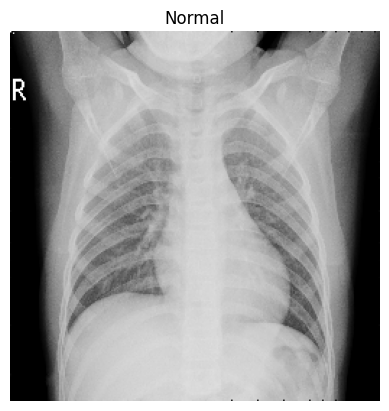

1/1 [==============================] - 0s 45ms/step
Probabilidades:
Normal: 84.85%
Pneumonia: 15.15%
Predicción: Normal


1/1 [==============================] - 0s 44ms/step


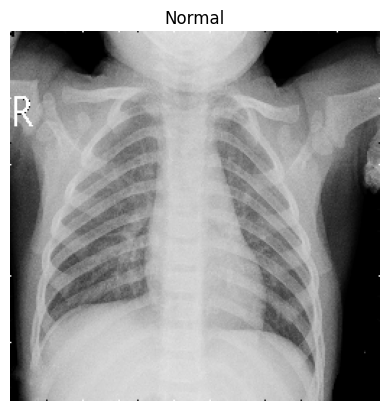

1/1 [==============================] - 0s 49ms/step
Probabilidades:
Normal: 77.32%
Pneumonia: 22.68%
Predicción: Normal


1/1 [==============================] - 0s 47ms/step


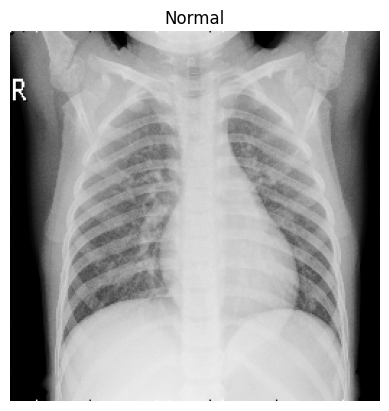

1/1 [==============================] - 0s 45ms/step
Probabilidades:
Normal: 95.24%
Pneumonia: 4.76%
Predicción: Normal


1/1 [==============================] - 0s 43ms/step


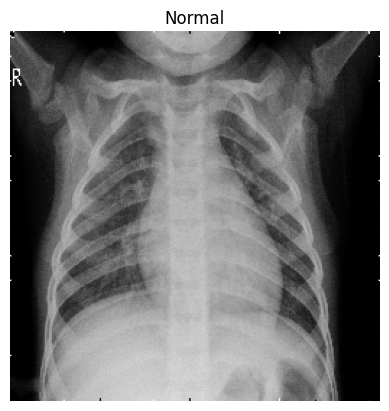

1/1 [==============================] - 0s 44ms/step
Probabilidades:
Normal: 70.68%
Pneumonia: 29.32%
Predicción: Normal


1/1 [==============================] - 0s 54ms/step


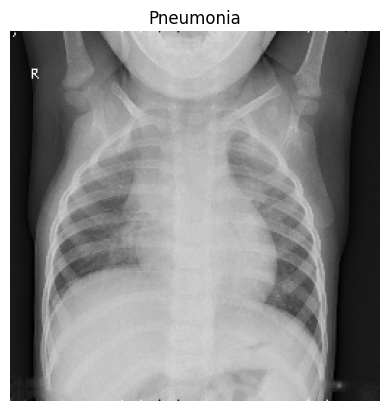

1/1 [==============================] - 0s 45ms/step
Probabilidades:
Normal: 16.71%
Pneumonia: 83.29%
Predicción: Pneumonia


1/1 [==============================] - 0s 45ms/step


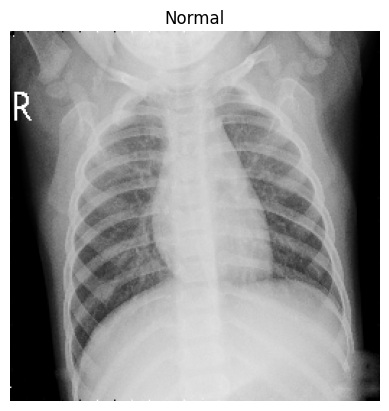

1/1 [==============================] - 0s 46ms/step
Probabilidades:
Normal: 63.32%
Pneumonia: 36.68%
Predicción: Normal


1/1 [==============================] - 0s 45ms/step


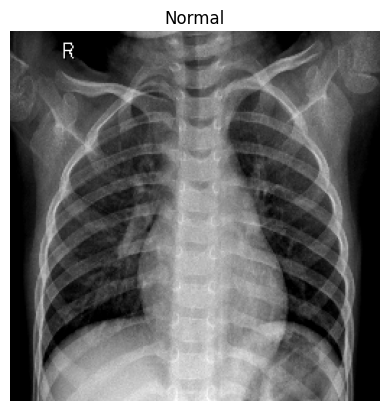

1/1 [==============================] - 0s 47ms/step
Probabilidades:
Normal: 96.66%
Pneumonia: 3.34%
Predicción: Normal


1/1 [==============================] - 0s 48ms/step


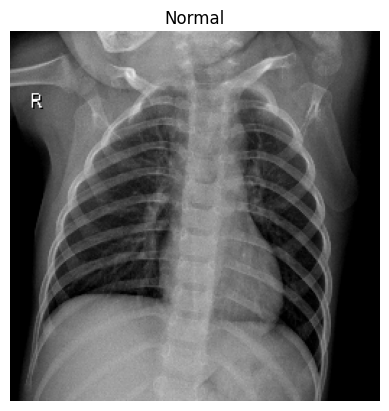

1/1 [==============================] - 0s 50ms/step
Probabilidades:
Normal: 99.89%
Pneumonia: 0.11%
Predicción: Normal




In [221]:
folder_path = './chest_xray/val/NORMAL'
predict_folder(folder_path)